# A free-by-cyclic group (example 2)

In [1]:
import twisted_l2
from twisted_l2 import FreeByCyclic
import itertools

In [2]:
twisted_l2.load_hap()

true

In [8]:
f, phi, inv = FreeByCyclic.random_automorphism(4, length=20, seed = int(9162526751589464890), print_latex=True)
F = FreeGroup(f.ngens() + 1)

\eta_{2,3} \cdot \sigma_{2,3} \cdot \tau_{4} \cdot \eta_{4,3} \cdot \eta_{3,1} \cdot \tau_{3} \cdot \sigma_{3,4} \cdot \sigma_{2,4} \cdot \eta_{3,1} \cdot \tau_{4} \cdot \eta_{2,1} \cdot \sigma_{1,4} \cdot \eta_{1,4} \cdot \eta_{1,4} \cdot \eta_{3,2} \cdot \sigma_{1,4} \cdot \eta_{2,3} \cdot \sigma_{1,3} \cdot \eta_{3,4} \cdot \eta_{3,1} \cdot \eta_{1,2} \cdot \sigma_{3,4} \cdot \eta_{2,4} \cdot \eta_{1,4} \cdot \eta_{3,2} \cdot \eta_{3,1} \cdot \eta_{4,3} \cdot \eta_{2,3} \cdot \eta_{2,3} \cdot \sigma_{1,4} \cdot \sigma_{3,4} \cdot \tau_{2} \cdot \eta_{1,2} \cdot \eta_{1,2} \cdot \sigma_{3,4} \cdot \sigma_{2,3} \cdot \eta_{4,3} \cdot \eta_{1,2} \cdot \eta_{2,1} \cdot \tau_{2} \cdot \eta_{4,3} \cdot \sigma_{2,4} \cdot \sigma_{1,2} \cdot \sigma_{1,2} \cdot \eta_{3,1} \cdot \eta_{4,1} \cdot \sigma_{1,2} \cdot \eta_{3,4} \cdot \sigma_{1,3} \cdot \eta_{2,4} \cdot \eta_{2,4} \cdot \eta_{1,4}


The automorphism is $\varphi = \eta_{2,3} \cdot \sigma_{2,3} \cdot \tau_{4} \cdot \eta_{4,3} \cdot \eta_{3,1} \cdot \tau_{3} \cdot \sigma_{3,4} \cdot \sigma_{2,4} \cdot \eta_{3,1} \cdot \tau_{4} \cdot \eta_{2,1} \cdot \sigma_{1,4} \cdot \eta_{1,4} \cdot \eta_{1,4} \cdot \eta_{3,2} \cdot \sigma_{1,4} \cdot \eta_{2,3} \cdot \sigma_{1,3} \cdot \eta_{3,4} \cdot \eta_{3,1} \cdot \eta_{1,2} \cdot \sigma_{3,4} \cdot \eta_{2,4} \cdot \eta_{1,4} \cdot \eta_{3,2} \cdot \eta_{3,1} \cdot \eta_{4,3} \cdot \eta_{2,3} \cdot \eta_{2,3} \cdot \sigma_{1,4} \cdot \sigma_{3,4} \cdot \tau_{2} \cdot \eta_{1,2} \cdot \eta_{1,2} \cdot \sigma_{3,4} \cdot \sigma_{2,3} \cdot \eta_{4,3} \cdot \eta_{1,2} \cdot \eta_{2,1} \cdot \tau_{2} \cdot \eta_{4,3} \cdot \sigma_{2,4} \cdot \sigma_{1,2} \cdot \sigma_{1,2} \cdot \eta_{3,1} \cdot \eta_{4,1} \cdot \sigma_{1,2} \cdot \eta_{3,4} \cdot \sigma_{1,3} \cdot \eta_{2,4} \cdot \eta_{2,4} \cdot \eta_{1,4}.$

In [9]:
FreeByCyclic.random_automorphism.seed

9162526751589464890

In [10]:
print([phi(x) for x in f.gens()])
print([inv(x) for x in f.gens()])
print([phi(inv(x)) for x in f.gens()])

[x0*x1^-1*x2*x3^-1, x0*x2*x3*x2^-1*x1*x0^-2*x2^-1*x1*x0, x3*x2^-1*x1*x0^-2*x2^-1*x1*x0*x3*x2^-1*x1*x2*x3*x2^-1*x1*x0^-2*x2^-1*x1*x0, x0*x2*x3*x2^-1*x1*x0^-2*x2^-1*x1*(x0*x2)^2*x3*x2^-1*x1*x0^-2*x2^-1*x1*x0^2*x1^-1*x2*x3^-1*x0^-1*x1^-1*x2*x0^2*x1^-1*x2*x3^-1*x2^-1*(x1^-1*x2*x3^-1*x0^-1*x1^-1*x2*x0^2)^2*x1^-1*x2*x3^-1*x2^-1*x0^-1]
[x1*x0^-1*x1*x2^-1*x1*x0*x2^-1*x1^-1*x3^-1*x1, x1^-1*x3*x1*x2*x0^-2*x1*x2^-1*x1*x0*x2^-1*x1^-1*x3^-1*x1*x0*x2*x1^-1*x0*x1^-1*x3*x1*x2*x0^-1*x1^-1*x2*x1^-1*x0*x1^-1, x1^-1*x3*x1*x2*x0^-1*x1^-1, x0^-1*(x1*x0^-1*x1*x2^-1*x1*x0*x2^-1*x1^-1*x3^-1*x1)^2*x0^-1*x1*x2^-1*x0^-1*x1^-1*x3*x1*x2*x0^-1*x1^-1*x2*x1^-1*x0*x1^-1]
[x0, x1, x2, x3]


## First method: compute a free $\mathbb Z[G]$-resolution of $\mathbb Z$

First, we make the free-by-cyclic group:

In [11]:
def relation(idx):
    """Returns a relation of the form t * g_i^-1 * t^-1 * phi(g_i) as a Tietze word."""
    n = f.ngens()
    return [n+1, -idx-1, -n-1] + list(phi(f.gen(idx)).Tietze())
    
G = F / [relation(i) for i in range(f.ngens())]
G

Finitely presented group < x0, x1, x2, x3, x4 | x4*x0^-1*x4^-1*x0*x1^-1*x2*x3^-1, x4*x1^-1*x4^-1*x0*x2*x3*x2^-1*x1*x0^-2*x2^-1*x1*x0, x4*x2^-1*x4^-1*x3*x2^-1*x1*x0^-2*x2^-1*x1*x0*x3*x2^-1*x1*x2*x3*x2^-1*x1*x0^-2*x2^-1*x1*x0, x4*x3^-1*x4^-1*x0*x2*x3*x2^-1*x1*x0^-2*x2^-1*x1*(x0*x2)^2*x3*x2^-1*x1*x0^-2*x2^-1*x1*x0^2*x1^-1*x2*x3^-1*x0^-1*x1^-1*x2*x0^2*x1^-1*x2*x3^-1*x2^-1*(x1^-1*x2*x3^-1*x0^-1*x1^-1*x2*x0^2)^2*x1^-1*x2*x3^-1*x2^-1*x0^-1 >

The stable letter is the last generator (`x4`).

In [12]:
G.abelian_invariants()

(0, 0, 2)

A free $\mathbb Z[G]$-resolution of $\mathbb Z$ is the same thing as a chain complex for the universal cover of $K(G, 1)$:

In [13]:
res = twisted_l2.ComponentObjectWrapper(libgap.ResolutionAsphericalPresentation(G, 3))

In [14]:
[res.dimension(i) for i in range(4)]

[1, 5, 4, 0]

In [15]:
cc = twisted_l2.get_differentials(res)

### How each class $\phi$ acts on the generators

In [16]:
[twisted_l2.gap_ZZ_to_int(twisted_l2.make_phi_from_coordinates(G, [1,0])(g)) for g in G.gens()]

[1, -2, -3, -1, 0]

In [17]:
[twisted_l2.gap_ZZ_to_int(twisted_l2.make_phi_from_coordinates(G, [0,1])(g)) for g in G.gens()]

[0, 0, 0, 0, 1]

If we identify `v` with $\phi$:

- $(1,0)$ has the stable letter in its kernel;
- $(0,1)$ is the canonical projection $G \twoheadrightarrow Z$.

Hence, $(0,1)$ is a fibered class for $G$.

In [18]:
twisted_l2.configs.LogOptions.LEVEL = twisted_l2.MINIMAL
twisted_l2.configs.LogOptions.PRECISION = 5

We compute the characteristic at the following values of `v`:

|  v   |  n  |
| :--: | ---:|
|(1,0) | 10  |
|(1,1) | 13  |
|(2,3) | 23  |
|(1,2) | 11  |
|(1,3) | 13  |
|(1,6) | 15  |
|(0,1) |  1  |
|(-1,7)| 10  |
|(-1,4)|  9  |
|(-1,3)| 13  |

In this table, `n` is the smallest expansion parameter at which (the floors of) the valuations stabilize.

We run the algorithm $3$ times:
- first with `n` and `exps = (2)`;
- then with `n+1` and `exps = (2)`;
- then with `n` and `exps = (0,2)`.

Heuristically, the rank computed in a finite quotient is a lower bound for the true Neumann rank.\
Hence, we take the ceiling of the rank (which is the same as taking the floor of each valuation).\
This is a stronger heuristic than the one in `borromean.ipynb`. It is useful because:

- quotients involving odd primes seem to always give abelian groups $L$;
- looking at $2$-groups, the $L$ from `exps = (3)` is very large (order 1024);
- however, using `exps = (2)` gives valuations that are not very close to integers.

If the heuristic is correct, we cover any $\text{error} < 1$ by taking the floor
(instead of $\text{error} < 1/2$ by rounding).

First, we define a little hack. The characteristic is a linear polynomial in the valuations $v_0, v_1, v_2, \dots$:

$$\chi^{(2)}(G; -) = - v_1 + 2v_2 -3v_3 + \dots + C.$$

Hence, if we have $(v_0, v_1, v_2, \dots)$ and $\chi^{(2)}(G; -)$, we can adjust the value to what it would have been, had we used the _floors_ of the valuations.

In [19]:
def characteristic_valuations_floor(char, valuations):
    return char + sum((-1)^j * j * (floor(val)-val) for j, val in enumerate(valuations))

In [20]:
%%time

vn = [
    ((1,0),  10),
    ((1,1),  13),
    ((2,3),  23),
    ((1,2),  11),
    ((1,3),  13),
    ((1,6),  15),
    ((0,1),   1),
    ((-1,7), 10),
    ((-1,4),  9),
    ((-1,3), 13)
]

for v,n in vn:
    print(f"===== v = {v}, n = {n}, 2-quotient =====")
    c1 = twisted_l2.characteristic(G, v, cc, n, (2,))
    logs = twisted_l2.get_twisted_l2_logs()
    structures = {l.L.StructureDescription().sage() for l in logs}
    vals1 = [l.valuation for l in logs]
    print(f"Structure of L        : {structures}")
    
    print(f"===== v = {v}, n = {n+1}, 2-quotient =====")
    c2 = twisted_l2.characteristic(G, v, cc, n+1, (2,))
    logs = twisted_l2.get_twisted_l2_logs()
    structures = {l.L.StructureDescription().sage() for l in logs}
    vals2 = [l.valuation for l in logs]
    print(f"Structure of L        : {structures}")
    
    print(f"===== v = {v}, n = {n}, 3-quotient =====")
    c3 = twisted_l2.characteristic(G, v, cc, n, (0,2))
    logs = twisted_l2.get_twisted_l2_logs()
    structures = {l.L.StructureDescription().sage() for l in logs}
    vals3 = [l.valuation for l in logs]
    print(f"Structure of L        : {structures}")
    
    valuations = (vals1, vals2, vals3)
    chars = (c1, c2, c3)
    print("-"*40)
    print(f"Floors of valuations  : {[[floor(val) for val in vals] for vals in valuations]}")
    print(f"Characteristics       : {[characteristic_valuations_floor(char, vals) for char, vals in zip(chars, valuations)]}")
    print()

===== v = (1, 0), n = 10, 2-quotient =====
Degrees of Laplacians : [6.0, 32.0, 26.0]
Valuations            : [0.0, 30.0, 9.0]
Quotient sizes        : [32, 32, 32]
Characteristic        : -10.0
Structure of L        : {'(C4 x C2) : C4'}
===== v = (1, 0), n = 11, 2-quotient =====
Degrees of Laplacians : [6.0, 32.0, 26.0]
Valuations            : [0.0, 30.0, 9.0]
Quotient sizes        : [32, 32, 32]
Characteristic        : -10.0
Structure of L        : {'(C4 x C2) : C4'}
===== v = (1, 0), n = 10, 3-quotient =====
Degrees of Laplacians : [6.0, 32.0, 26.0]
Valuations            : [0.0, 30.0, 9.0]
Quotient sizes        : [9, 9, 9]
Characteristic        : -10.0
Structure of L        : {'C9'}
----------------------------------------
Floors of valuations  : [[0, 30, 9], [0, 30, 9], [0, 30, 9]]
Characteristics       : [-10, -10, -10]

===== v = (1, 1), n = 13, 2-quotient =====
Degrees of Laplacians : [6.0, 29.25, 23.25]
Valuations            : [0.0, 32.375, 10.375]
Quotient sizes        : [32, 32

All values are consistent (i.e. the floors of the valuations stabilize). Summary of results:

|  v   | $\chi^{(2)}(G; \phi)$ |
|:---: | ---:|
|(1, 0)| -10 |
|(1, 1)|  -9 |
|(2, 3)| -19 |
|(1, 2)| -10 |
|(1, 3)| -12 |
|(1, 6)| -18 |
|(0, 1)|  -3 |
|(-1,7)| -21 |
|(-1,4)| -15 |
|(-1,3)| -13 |

## Second method: construct the presentation complex

In [24]:
fbc = FreeByCyclic(f, phi)

In [25]:
fl = twisted_l2.face_lattice_to_hap(fbc.make_fl())

In [26]:
cw = twisted_l2.cw_complex(fl)

In [27]:
chain_complex = twisted_l2.equivariant_cc(cw)

In [28]:
edge_to_word = twisted_l2.gap_member(chain_complex.group, "edgeToWord")

In [42]:
[chain_complex.dimension(j) for j in range(3)]

[1, 5, 4]

In [29]:
G = twisted_l2.get_fundamental_group(chain_complex)

In [30]:
cc = twisted_l2.get_differentials(chain_complex)

In [31]:
G

Finitely presented group < f1, f2, f3, f4, f5 | f1^-1*f4^-1*f3^-1*f1^-1*f2*f1*f4^-1*f2^-1*f1^-2*f5*(f2*f1*f4^-1*f1^-1)^2*f2*f1*f4^-1*f2^-1*f1^-2*f5*f1^2*f2*f4*f1^-1*f2^-1*f5^-1*f1^2*f2*(f4*f1^-1*f2^-1*f1)^2*f4*f1^-1*f2^-1*f5^-1*f1^2*f2*f4*f1^-1*f2^-1*f1*f3*f4, f5^-1*f2^-1*f4^-1*f3^-1*f1^-1*f2*f1*f4^-1*f2^-1*f1^-2*f5*(f2*f1*f4^-1*f1^-1)^2*f2*f1*f4^-1*f2^-1*f1^-2*f5*f1^2*f2*f4*f1^-1*f2^-1*f1*f4*f1^-1*f2^-1*f5^-1*f1^2*f2*f4*f1^-1*f2^-1*f1*f3*f4, f5^-1*f1*f4^-1*f3^-1*f1^-1*f2*f1*f4^-1*f2^-1*f1^-2*f5*(f2*f1*f4^-1*f1^-1)^2*f2*f1*f4^-1*f2^-1*f1^-2*f5*f1^2*f2*f1^-1*f2*f1*f4^-1*f2^-1*f1^-2*f5*f2*f1*f4^-1*f1^-1*f2*f1*f4^-1*f2^-1*f1^-2*f5^-1*f1^2*f2*(f4*f1^-1*f2^-1*f1)^2*f4*f1^-1*f2^-1*f5^-1*f1^2*f2*f4*f1^-1*f2^-1*f1*f3*f4, f1*f2*f3^-1*f4*f1^-1*f2^-1*f1^2*f2*f1^-1*f2*f1*f4^-1*f2^-1*f1^-2*f5^2*f1*f2*f4*f1^-1*f2^-1*f1*f4*f1^-1*f2^-1*f5^-1*f1^2*f2*f4*f1^-1*f2^-1*f1*f3*f4 >

### Retrieving the original free-by-cyclic generators

In [32]:
# Find the indices of 1-cells corresponding to the stable letter and generators
st = [fbc.edge_backT()+1, fbc.edge_frontT()+1]
gens = [[fbc.edge_G(i, twisted_l2.free_by_cyclic.GEN_EDGE_BACK)+1,
         fbc.edge_G(i, twisted_l2.free_by_cyclic.GEN_EDGE_FRONT)+1] for i in range(fbc.N)]

In [33]:
# Get the corresponding elements of G
loops = gens + [st]
loopsG = [G((edge_to_word(e0) * edge_to_word(e1)^-1).UnderlyingElement().LetterRepAssocWord().sage()) for e0,e1 in loops]

In [34]:
print(f"Stable letter: {loopsG[-1]}")
print(f"Generators of F_{fbc.N}: {loopsG[:-1]}")

Stable letter: f4^-1*f3^-1*f1^-1*f2*f1*f4^-1*f2^-1*f1^-2*f5*(f2*f1*f4^-1*f1^-1)^2*f2*f1*f4^-1*f2^-1*f1^-2*f5*f1
Generators of F_4: [f1^-1, f5^-1*f2^-1, f5^-1*f1, f1*f2*f4]


In [38]:
[twisted_l2.gap_ZZ_to_int(twisted_l2.make_phi_from_coordinates(G, [6,7])(g)) for g in loopsG]

[1, -2, -3, -1, 0]

In [37]:
[twisted_l2.gap_ZZ_to_int(twisted_l2.make_phi_from_coordinates(G, [-1,-1])(g)) for g in loopsG]

[0, 0, 0, 0, 1]

Consider the basis $B = \{e_1 = (6,7), e_2 = (-1,-1)\}$ for `v`. If we identify `v` with $\phi$:

- $e_1$ has the stable letter in its kernel;
- $e_2$ is the canonical projection $G \twoheadrightarrow Z$.

Hence, $e_2$ is a fibered class for $G$.

In [39]:
def in_basis_B(t):
    return [6*t[0]-t[1], 7*t[0]-t[1]]

### Doing the computation in this basis

In [40]:
twisted_l2.configs.LogOptions.LEVEL = twisted_l2.MINIMAL

Heuristically, the rank computed in a finite quotient is a lower bound for the true Neumann rank.\
Hence, we take the ceiling of the rank (which is the same as taking the floor of each valuation).\
This is a stronger heuristic than the one in `borromean.ipynb`. It is useful because:

- quotients involving odd primes seem to always give abelian groups $L$;
- looking at $2$-groups, the $L$ from `exps = (3)` is very large (order 1024);
- however, using `exps = (2)` gives valuations that are not very close to integers.

If the heuristic is correct, we cover any $\text{error} < 1$ by taking the floor
(instead of $\text{error} < 1/2$ by rounding).

First, we define a little hack. The characteristic is a linear polynomial in the valuations $v_0, v_1, v_2, \dots$:

$$\chi^{(2)}(G; -) = - v_1 + 2v_2 -3v_3 + \dots + C.$$

Hence, if we have $(v_0, v_1, v_2, \dots)$ and $\chi^{(2)}(G; -)$, we can adjust the value to what it would have been, had we used the _floors_ of the valuations.

In [19]:
def characteristic_valuations_floor(char, valuations):
    return char + sum((-1)^j * j * (floor(val)-val) for j, val in enumerate(valuations))

When using this method, `cc` is more complicated, so the algorithm takes longer.\
Hence we will only try `v = (0,1)` (the fibered class). You can add more to the list `vn`.

In [45]:
%%time

vn = [
    ((0,1), 1),
]

for v,n in vn:
    print(f"===== v = {v}, n = {n}, 2-quotient =====")
    c1 = twisted_l2.characteristic(G, in_basis_B(v), cc, n, (2,))
    logs = twisted_l2.get_twisted_l2_logs()
    structures = {l.L.StructureDescription().sage() for l in logs}
    vals1 = [l.valuation for l in logs]
    print(f"Structure of L        : {structures}")
    
    print(f"===== v = {v}, n = {n+1}, 2-quotient =====")
    c2 = twisted_l2.characteristic(G, in_basis_B(v), cc, n+1, (2,))
    logs = twisted_l2.get_twisted_l2_logs()
    structures = {l.L.StructureDescription().sage() for l in logs}
    vals2 = [l.valuation for l in logs]
    print(f"Structure of L        : {structures}")
    
    print(f"===== v = {v}, n = {n}, 3-quotient =====")
    c3 = twisted_l2.characteristic(G, in_basis_B(v), cc, n, (0,2))
    logs = twisted_l2.get_twisted_l2_logs()
    structures = {l.L.StructureDescription().sage() for l in logs}
    vals3 = [l.valuation for l in logs]
    print(f"Structure of L        : {structures}")
    
    valuations = (vals1, vals2, vals3)
    chars = (c1, c2, c3)
    print("-"*40)
    print(f"Floors of valuations  : {[[floor(val) for val in vals] for vals in valuations]}")
    print(f"Characteristics       : {[characteristic_valuations_floor(char, vals) for char, vals in zip(chars, valuations)]}")
    print()

===== v = (0, 1), n = 1, 2-quotient =====
Degrees of Laplacians : [2.0, 10.0, 8.0]
Valuations            : [0.0, 0.0, 0.0]
Quotient sizes        : [1, 32, 32]
Characteristic        : -3.0
Structure of L        : {'1', 'C2 x (C4 : C4)'}
===== v = (0, 1), n = 2, 2-quotient =====
Degrees of Laplacians : [2.0, 10.0, 8.0]
Valuations            : [0.0, 0.0, 0.0]
Quotient sizes        : [32, 32, 32]
Characteristic        : -3.0
Structure of L        : {'C2 x (C4 : C4)'}
===== v = (0, 1), n = 1, 3-quotient =====
Degrees of Laplacians : [2.0, 10.0, 8.0]
Valuations            : [0.0, 0.0, 0.0]
Quotient sizes        : [1, 9, 9]
Characteristic        : -3.0
Structure of L        : {'1', 'C9'}
----------------------------------------
Floors of valuations  : [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
Characteristics       : [-3, -3, -3]

CPU times: user 8.24 s, sys: 6.66 ms, total: 8.25 s
Wall time: 8.26 s


## Conclusion

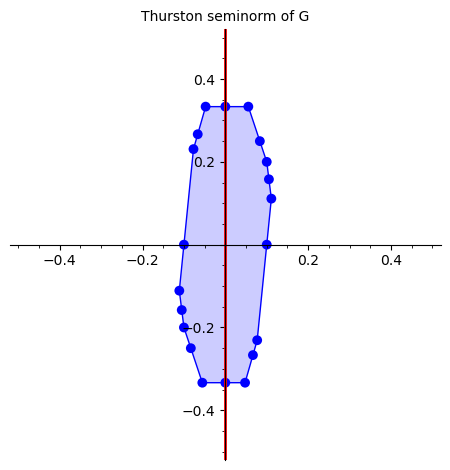

In [23]:
boundary = [
    (1/10, 0),
    (1/9, 1/9),
    (2/19, 3/19),
    (1/10, 2/10),
    (1/12, 3/12),
    (1/18, 6/18),
    (0, 1/3),
    (-1/21,7/21),
    (-1/15,4/15),
    (-1/13,3/13)
]
boundary = boundary + [(-a,-b) for a,b in boundary]

show(
    list_plot(boundary,
               aspect_ratio=1, size=50, xmin = -0.5, xmax = 0.5, ymin = -0.5, ymax = 0.5,
               title = "Thurston seminorm of G")
    + polygon(boundary + boundary[:1], alpha=0.2)
    + polygon(boundary + boundary[:1], fill=False)
    + line([(0,-1), (0,1)], color="red", thickness=2)
)

Both methods give $-3$ as the characteristic of the fibered class $(0,1)$ (in red) corresponding to $G \twoheadrightarrow \mathbb Z$.\
This is the _fiber Euler characteristic_, as $\chi(F_4) = -3$.